In [59]:
from sagas.nlu.ruleset_procs import cached_chunks
from sagas.conf.conf import cf
sents='What do you think about the war?'
lang='en'
# domain='verb_domains'
# domain='aux_domains'
domain='subj_domains'
chunks = cached_chunks(sents, lang, cf.engine(lang))
domains = chunks[domain]
domains

[{'index': '3',
  'text': 'you',
  'lemma': 'you',
  'upos': 'PRON',
  'xpos': 'PRP',
  'feats': 'Case=Nom|Person=2|PronType=Prs',
  'governor': 4,
  'dependency_relation': 'nsubj',
  'aux': [{'index': '2',
    'text': 'do',
    'lemma': 'do',
    'upos': 'AUX',
    'xpos': 'VBP',
    'feats': 'Mood=Ind|Tense=Pres|VerbForm=Fin',
    'governor': 4,
    'dependency_relation': 'aux'}],
  'obj': [{'index': '1',
    'text': 'What',
    'lemma': 'what',
    'upos': 'PRON',
    'xpos': 'WP',
    'feats': 'PronType=Int',
    'governor': 4,
    'dependency_relation': 'obj'}],
  'nsubj': [{'index': '3',
    'text': 'you',
    'lemma': 'you',
    'upos': 'PRON',
    'xpos': 'PRP',
    'feats': 'Case=Nom|Person=2|PronType=Prs',
    'governor': 4,
    'dependency_relation': 'nsubj'}],
  'obl': [{'index': '7',
    'text': 'war',
    'lemma': 'war',
    'upos': 'NOUN',
    'xpos': 'NN',
    'feats': 'Number=Sing',
    'governor': 4,
    'dependency_relation': 'obl',
    'det': [{'index': '6',
      '

In [66]:
main_domains=next((e, chunks[e]) for e in ('predicts', 'verb_domains', 
               'aux_domains' , 'subj_domains', 
               'root_domains') if len(chunks[e])>0 )
main_domains[0]

'verb_domains'

In [60]:
def traverse(dict_or_list, path=[]):
    if isinstance(dict_or_list, dict):
        iterator = dict_or_list.items()
    else:
        iterator = enumerate(dict_or_list)
    for k, v in iterator:
        yield path + [k], v
        if isinstance(v, (dict, list)):
            for k, v in traverse(v, path + [k]):
                yield k, v


def iter_type(spec, el, attr=None):
    rs_map={}
    for path, node in traverse(el):
        if isinstance(node, spec):
            print(path, node if attr is None else node[attr])
            rs_map[tuple(path)]=node
    return rs_map

el=domains[0]
el_root=el['text']
items=iter_type(dict, el, 'text')
print('-'*30)
_=iter_type(str, el)

['aux', 0] do
['obj', 0] What
['nsubj', 0] you
['obl', 0] war
['obl', 0, 'det', 0] the
['obl', 0, 'case', 0] about
['punct', 0] ?
['dc'] think
------------------------------
['index'] 3
['text'] you
['lemma'] you
['upos'] PRON
['xpos'] PRP
['feats'] Case=Nom|Person=2|PronType=Prs
['dependency_relation'] nsubj
['aux', 0, 'index'] 2
['aux', 0, 'text'] do
['aux', 0, 'lemma'] do
['aux', 0, 'upos'] AUX
['aux', 0, 'xpos'] VBP
['aux', 0, 'feats'] Mood=Ind|Tense=Pres|VerbForm=Fin
['aux', 0, 'dependency_relation'] aux
['obj', 0, 'index'] 1
['obj', 0, 'text'] What
['obj', 0, 'lemma'] what
['obj', 0, 'upos'] PRON
['obj', 0, 'xpos'] WP
['obj', 0, 'feats'] PronType=Int
['obj', 0, 'dependency_relation'] obj
['nsubj', 0, 'index'] 3
['nsubj', 0, 'text'] you
['nsubj', 0, 'lemma'] you
['nsubj', 0, 'upos'] PRON
['nsubj', 0, 'xpos'] PRP
['nsubj', 0, 'feats'] Case=Nom|Person=2|PronType=Prs
['nsubj', 0, 'dependency_relation'] nsubj
['obl', 0, 'index'] 7
['obl', 0, 'text'] war
['obl', 0, 'lemma'] war
['obl',

In [44]:
for e in items.keys():
    print(e, '->', 'root' if len(e)==2 else e[0:-2])

('aux', 0) -> root
('obj', 0) -> root
('nsubj', 0) -> root
('obl', 0) -> root
('obl', 0, 'det', 0) -> ('obl', 0)
('obl', 0, 'case', 0) -> ('obl', 0)
('punct', 0) -> root
('dc',) -> ()


In [21]:
obl=items[('obl', 0)]
obl

{'index': '7',
 'text': 'war',
 'lemma': 'war',
 'upos': 'NOUN',
 'xpos': 'NN',
 'feats': 'Number=Sing',
 'governor': 4,
 'dependency_relation': 'obl',
 'det': [{'index': '6',
   'text': 'the',
   'lemma': 'the',
   'upos': 'DET',
   'xpos': 'DT',
   'feats': 'Definite=Def|PronType=Art',
   'governor': 7,
   'dependency_relation': 'det'}],
 'case': [{'index': '5',
   'text': 'about',
   'lemma': 'about',
   'upos': 'ADP',
   'xpos': 'IN',
   'feats': '_',
   'governor': 7,
   'dependency_relation': 'case'}]}

.. root you
('aux', 0) -> root
	 do root aux.0
('obj', 0) -> root
	 What root obj.0
('nsubj', 0) -> root
	 you root nsubj.0
('obl', 0) -> root
	 war root obl.0
('obl', 0, 'det', 0) -> ('obl', 0)
	 the war obl.0.det.0
('obl', 0, 'case', 0) -> ('obl', 0)
	 about war obl.0.case.0
('punct', 0) -> root
	 ? root punct.0


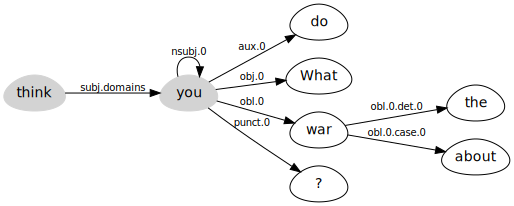

In [63]:
class BaseViz(object):
    def __init__(self, shape='egg', size='8,5', fontsize=0, enable_node_pos=False, translit_lang=None):
        from graphviz import Digraph
        self.f = Digraph('deps', filename='deps.gv')
        self.f.attr(rankdir='LR', size=size)
        # font 'Calibri' support Arabic text
        self.f.attr('node', shape=shape, fontname='Calibri')
        if fontsize != 0:
            self.f.attr(fontsize=str(fontsize))
        self.enable_node_pos=enable_node_pos
        self.translit_lang=translit_lang
    
    def default_node(self):
        self.f.attr('node', style='solid', color='black')
    def edge(self, head, node, rel):
        self.f.edge(head, node, 
                    rel, fontsize='10', fontname='Calibri')
    def node(self, text, emphasis=False):
        if emphasis:
            self.f.attr('node', style='filled', color='lightgrey')
        self.f.node(text)
        if emphasis:
            self.default_node()

viz=BaseViz()
print('.. root', el_root)
viz.node(el_root, True)
for e in items.keys():
    if e[0]=='dc':
        dc=el['dc']['text']
        viz.node(dc, True)
        viz.edge(dc, el_root, domain.replace('_', '.'))
    else:
        head='root' if len(e)==2 else e[0:-2]
        print(e, '->', head)
        print('\t', items[e]['text'], items[head]['text'] if head!='root' else 'root', '.'.join(map(str, e)))
        viz.edge(items[head]['text'] if head!='root' else el_root, 
                 items[e]['text'], 
                 '.'.join(map(str, e)))

viz.f

✁ dependency-graph. -------------------------


,index,text,lemma,upos,xpos
0,1,What,what,PRON,WP
1,2,do,do,AUX,VBP
2,3,you,you,PRON,PRP
3,4,think,think,VERB,VB
4,5,about,about,ADP,IN
5,6,the,the,DET,DT
6,7,war,war,NOUN,NN
7,8,?,?,PUNCT,.


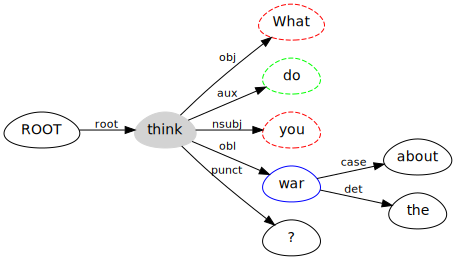

In [41]:
from sagas.nlu.uni_remote_viz import list_contrast, display_doc_deps
from sagas.tracker_jupyter import enable_jupyter_tracker
enable_jupyter_tracker()
display_doc_deps(chunks['doc'], None)